## Import

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = './movie_data.csv'
movie_data = pd.read_csv(file_path)
movie_data.head()

,Title,Release time,Age rating,Runtime,Language,IMDb Rating,IMDb Votes,Action/Adventure,Animation,Biography/History/War,...,Drama,Fantasy/Sci-Fi,Horror/Thriller/Mystery,Kids/Family,Music/Musical,Other,Romance,Win,Nomination,Age rating quantification
0,Goon Squad,2024-01-18,NC-17,83.0,English,6.1,12398.815824,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,5
1,The Phantom Warrior,2024-02-20,R,83.0,English,2.6,532.000000,True,False,False,...,False,True,False,False,False,False,False,0.0,0.0,4
2,Beyond the Lake,2024-01-26,G,98.0,English,6.1,31.000000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,1
3,Crimes of Fashion: Killer Clutch,2024-03-15,PG,84.0,"English, French",5.8,503.000000,False,False,False,...,True,False,True,False,False,False,False,0.0,0.0,2
4,Love on the Danube: Love Song,2024-09-10,G,84.0,English,5.8,175.000000,False,False,False,...,False,False,False,False,False,False,True,0.0,0.0,1


## Câu 3: Các phim thuộc thể loại nào có nhiều khả năng được đề cử hoặc giành giải thưởng nhất?

### Lợi ích của việc trả lời câu hỏi này:
- Giúp các nhà làm phim định hướng chọn thể loại để tăng khả năng được đề cử và giành giải thưởng.
- Tối ưu hoá chiến lược phát triển nội dung dựa trên xu hướng thành công.
- Các nhà đầu tư có thể định hướng tài trợ vào các dự án có khả năng được đánh giá cao.
- Hiểu rõ xu hướng thị hiếu và tiêu chí đánh giá từ các hội đồng giải thưởng.

### Cách thực hiện: 
- Phân tích mối tương quan giữa thể loại phim và số lần được đề cử hoặc giành giải (dựa vào cột "Win" và "Nomination").
- Tính tổng số lần đề cử và giải thưởng của từng thể loại.
- Xác định thể loại nổi bật bằng cách sắp xếp theo số liệu tổng hợp.
- Vẽ biểu đồ thanh (bar chart) để thể hiện tổng số đề cử và giải thưởng của từng thể loại.
- Sử dụng biểu đồ tròn (pie chart) để phân tích tỉ lệ đóng góp của các thể loại hàng đầu.

In [9]:
genre_columns = [
    "Action/Adventure", "Animation", "Biography/History/War", "Comedy",
    "Docummentary", "Drama", "Fantasy/Sci-Fi", "Horror/Thriller/Mystery",
    "Kids/Family", "Music/Musical", "Other", "Romance"
]

# Tính tổng số đề cử và thắng giải của từng thể loại
genre_awards = {
    genre: {
        "Nominations": movie_data.loc[movie_data[genre] == True, "Nomination"].sum(),
        "Wins": movie_data.loc[movie_data[genre] == True, "Win"].sum()
    }
    for genre in genre_columns
}

genre_awards_df = pd.DataFrame(genre_awards).T
genre_awards_df['Total'] = genre_awards_df['Nominations'] + genre_awards_df['Wins']

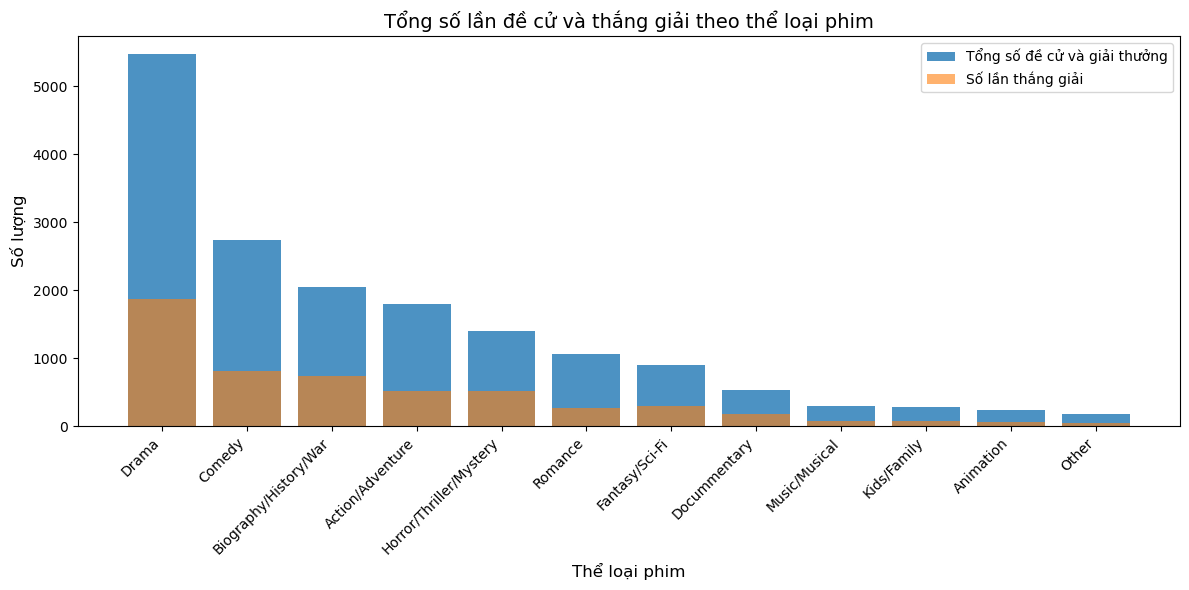

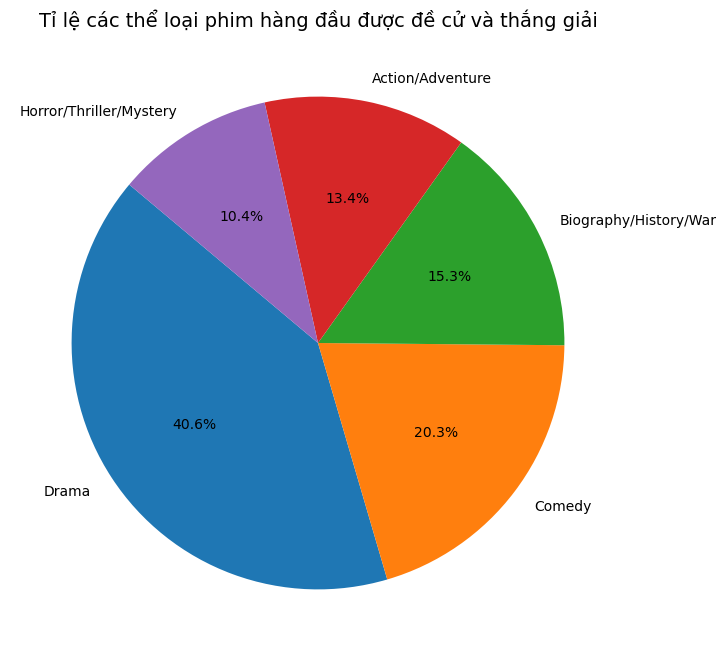

In [11]:
# Sắp xếp theo tổng số lần đề cử và thắng giải
genre_awards_df = genre_awards_df.sort_values(by="Total", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(genre_awards_df.index, genre_awards_df['Total'], alpha=0.8, label='Tổng số đề cử và giải thưởng')
plt.bar(genre_awards_df.index, genre_awards_df['Wins'], alpha=0.6, label='Số lần thắng giải')

plt.title('Tổng số lần đề cử và thắng giải theo thể loại phim', fontsize=14)
plt.xlabel('Thể loại phim', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Trực quan hóa tỉ lệ các thể loại hàng đầu
top_genres = genre_awards_df.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_genres['Total'], labels=top_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỉ lệ các thể loại phim hàng đầu được đề cử và thắng giải', fontsize=14)
plt.show()

### Nhận xét: 
#### Tổng số lần đề cử và thắng giải theo thể loại
##### Biểu đồ cột (Bar Chart):

1. Thể loại nổi bật:
- Các thể loại như Drama, Biography/History/War, và Action/Adventure có số lần đề cử và thắng giải cao nhất.
- Drama vượt trội rõ ràng với tổng số lần được đề cử và thắng giải lớn nhất.

2. Thể loại kém nổi bật:
- Thể loại như Other, Kids/Family, và Music/Musical có số lượng thấp hơn, ít cơ hội xuất hiện trong các đề cử hoặc thắng giải.

3. Kết luận:
- Drama là thể loại thường được giới chuyên môn chú ý và dễ đạt giải thưởng.
- Các thể loại có tính giáo dục và ý nghĩa lịch sử (Biography/History/War) cũng thường được đề cao.

#### Tỉ lệ các thể loại phim hàng đầu
##### Biểu đồ tròn (Pie Chart):

1. Drama chiếm ưu thế:
- Phần lớn các đề cử và thắng giải tập trung ở thể loại này.

2. Sự phân bổ còn lại:
- Các thể loại như Biography/History/War và Action/Adventure chiếm tỷ lệ đáng kể nhưng không vượt quá Drama.
- Các thể loại như Comedy, Fantasy/Sci-Fi có mặt trong danh sách nhưng không phải là thế mạnh.

3. Đánh giá từ biểu đồ tròn:
- Các bộ phim có nội dung sâu sắc, cảm xúc (Drama) hoặc các câu chuyện lịch sử, nhân văn (Biography/History/War) dễ gây ấn tượng với hội đồng giải thưởng.

### Kết luận chung:

1. Drama là "ứng cử viên" sáng giá:
- Các bộ phim thuộc thể loại Drama thường nhận được nhiều sự chú ý nhất từ các giải thưởng.

2. Đề cử không đồng nghĩa với thắng giải:
- Dù nhiều thể loại có số lượng đề cử lớn, không phải tất cả đều chuyển hóa thành chiến thắng.

3. Chiến lược sản xuất:
- Nếu mục tiêu là đạt giải thưởng, các nhà sản xuất nên tập trung vào Drama hoặc kết hợp nội dung với yếu tố lịch sử, tiểu sử.

4. Cần cân nhắc khán giả:
- Trong khi các thể loại như Kids/Family ít đạt giải, chúng vẫn có thể thành công thương mại vì đáp ứng nhu cầu giải trí.